In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.nonparametric.kde import KDEUnivariate 
from statsmodels.nonparametric import smoothers_lowess 
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

import numpy as np 
import pandas as pd
import statsmodels.api as sm

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [2]:
#读取数据
titanic_data = pd.read_csv("data/train.csv")
titanic_data.shape

(891, 12)

In [3]:
list(titanic_data)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
titanic_data[500:510]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S


In [5]:
#完全从DataFrame中删除票证和机舱功能
titanic_data = titanic_data.drop(['Ticket','Cabin'], axis=1)

In [6]:
#从所有剩余功能中删除所有NaN值
titanic_data = titanic_data.dropna()

Text(0.5,1,'Passengers per boarding location')

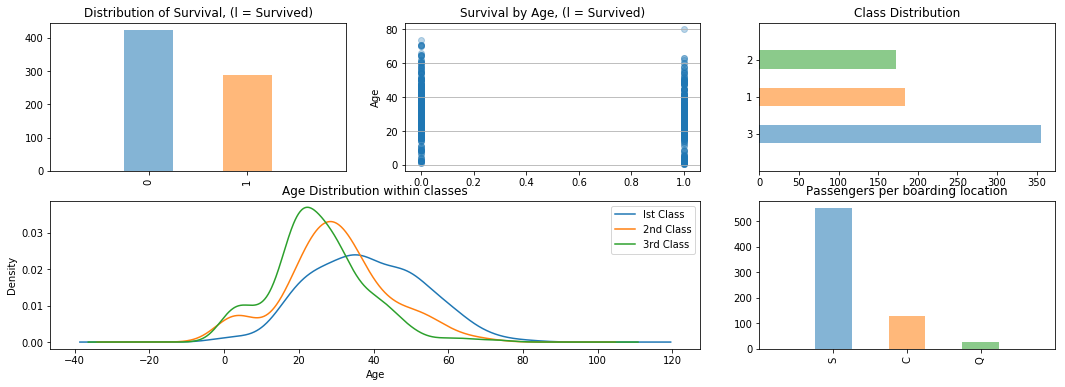

In [7]:
# 图参数声明
fig = plt.figure(figsize=(18,6)) 
alpha=alpha_scatterplot = 0.3 
alpha_bar_chart = 0.55
# Defining a grid of subplots to contain all the figures 
axl = plt.subplot2grid((2,3),(0,0))
# 添加第一个条形图，表示幸存的人和没有幸存的人的数量。
titanic_data.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# 添加边距
axl.set_xlim(-1, 2)
# 添加图标题
plt.title("Distribution of Survival, (l = Survived)") 
plt.subplot2grid((2,3),(0,1)) 
plt.scatter(titanic_data.Survived, titanic_data.Age, alpha=alpha_scatterplot)
# 设置y标签的值(年龄)
plt.ylabel("Age")
# 格式化
plt.grid(b=True, which='major', axis='y') 
plt.title("Survival by Age, (l = Survived)") 
ax3 = plt.subplot2grid((2,3),(0,2))
titanic_data.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart) 
ax3.set_ylim(-1, len(titanic_data.Pclass.value_counts()))
plt.title("Class Distribution") 
plt.subplot2grid((2,3),(1,0), colspan=2)
# plotting kernel density estimate of the subse of the lst class passenger’s age
titanic_data.Age[titanic_data.Pclass == 1].plot(kind='kde') 
titanic_data.Age[titanic_data.Pclass == 2].plot(kind='kde') 
titanic_data.Age[titanic_data.Pclass == 3].plot(kind='kde')
# 将x标记(年龄)添加到绘图中
plt.xlabel("Age")
plt.title("Age Distribution within classes")
# Add legend to the plot.
plt.legend(('lst Class', '2nd Class','3rd Class'),loc='best') 
ax5 = plt.subplot2grid((2,3),(1,2)) 
titanic_data.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(titanic_data.Embarked.value_counts())) 
plt.title("Passengers per boarding location")

Text(0.5,1,'Breakdown of survivals(O = Died, l = Survived)')

<Figure size 432x288 with 0 Axes>

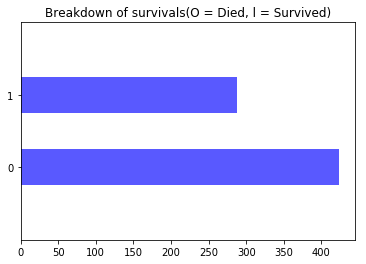

In [8]:
#绘制一个条形图来查看每个类中的观察数(存活/死亡)
plt.figure(figsize=(6,4)) 
fig, ax = plt.subplots()
titanic_data.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(titanic_data.Survived.value_counts())) 
plt.title("Breakdown of survivals(O = Died, l = Survived)")

(-1, 2)

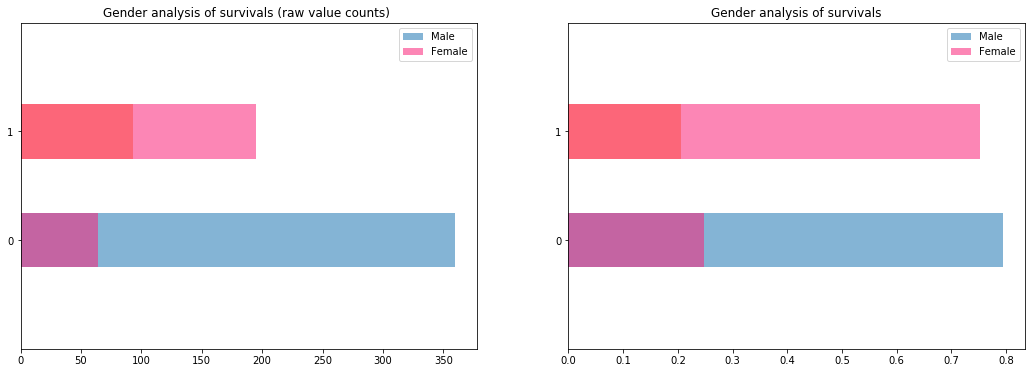

In [9]:
#将先前的图表按性别细分，来更好地理解这些数据
fig = plt.figure(figsize=(18,6))
#为幸存者绘制基于性别的分析。
male = titanic_data.Survived[titanic_data.Sex == 'male'].value_counts().sort_index()
female = titanic_data.Survived[titanic_data.Sex == 'female'].value_counts().sort_index()
axl = fig.add_subplot(121) 
male.plot(kind='barh',label='Male', alpha=0.55)
female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55) 
plt.title("Gender analysis of survivals (raw value counts) "); plt.legend(loc='best')
axl.set_ylim(-1, 2)
ax2 = fig.add_subplot(122) 
(male/float(male.sum())).plot(kind='barh',label='Male', alpha=0.55) 
(female/float(female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Gender analysis of survivals"); plt.legend(loc='best') 
ax2.set_ylim(-1, 2)


In [10]:
#为了使用logistic回归，我们需要创建一个公式，告诉模型我们要给它的特性/输入类型
# 模型公式
# ~表示=, 数据集的特征被写成预测生存的公式。C()让我们的回归知道这些变量是绝对的。
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)'
# create a results dictionary to hold our regression results for easy analysis later
results = {}
# 使用 patsy's dmatrices 函数创建一个回归友好的数据框架 
y,x = dmatrices(formula, data=titanic_data, return_type='dataframe')
# 实例化模型
model = sm.Logit(y,x)
# 将我们的模型与培训数据相匹配
res = model.fit()
# 保存结果，以便稍后输出预测
results['Logit'] = [res, formula]
res.summary() 

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Wed, 17 Oct 2018   Pseudo R-squ.:                  0.3414
Time:                        14:07:05   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000       3.613       5.471
C(Pclass)[T.2]      -1.2673      0.299     -4.245      0.000      -1.852      -0.682
C(Pclass)[T.3]      -2.4966      0.296     -8.422      0.000      -3.078      -1.916
C(Sex)[T.male]      -2.6239      0.218    -12.060      0.000      -3.050      -2.197
C(Embarked)[T.Q]    -0.8351      0.597     -1.398      0.162      -2.006       0.335
C(Embarked)[T.S]    -0.4254      0.271     -1.572      0.116      -0.956       0.105
Age                 -0.0436      0.008     -5.264      0.000      -0.060      -0.027
SibSp               -0.3697      0.123     -3.004      0.003      -0.611      -0.129
====================================================================================
"""

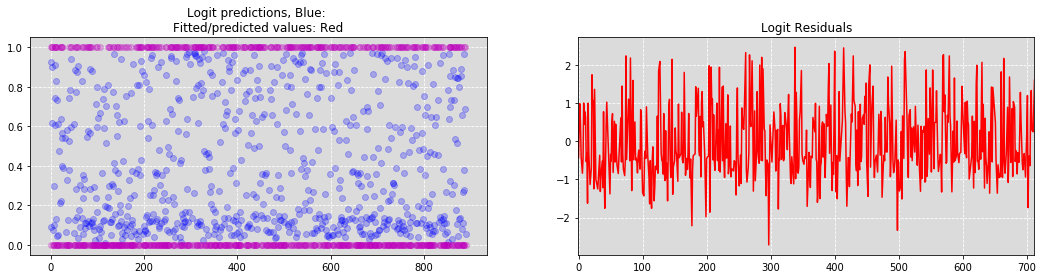

In [11]:
#画出我们的模型和实际模型的预测以及残差(目标变量的实际值和预测值之间的差异)
plt.figure(figsize=(18,4)); 
plt.subplot(121, facecolor="#DBDBDB")
# 根据我们的拟合模型生成预测
ypred = res.predict(x)
plt.plot(x.index, ypred,'bo',x.index,y,'mo', alpha=.25); 
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');
# 剩余误差
ax2 = plt.subplot(122, facecolor="#DBDBDB") 
plt.plot(res.resid_dev, 'r-') 
plt.grid(color='white', linestyle='dashed') 
ax2.set_xlim(-1, len(res.resid_dev)) 
plt.title('Logit Residuals');